### We have sleep data and we need to answer the question: You have an exam tomorrow, should you get a good night sleep? Would it matter?

In [1]:
!ls

BBC Results .csv                     README.md
Data_Analyst.ipynb                   chopstick-effectiveness.csv
Honing My Data Analysis Skills.ipynb


In [2]:
# Import pandas for data analysis and numpy for numerical analysis
import pandas as pd
import numpy as np

In [3]:
# Read the BBC sleep data into a dataframe
sleep_data = pd.read_csv('BBC Results .csv')
sleep_data

,Timestamp,How many hours did you sleep last night?,Recognition Score,Temporal Memory Score
0,12/11/2012 18:16:31,7.0,91,86
1,12/13/2012 14:31:16,6.5,95,78
2,12/13/2012 14:31:30,7.0,95,56
3,12/13/2012 14:32:01,5.0,91,81
4,12/13/2012 14:34:07,8.5,100,75
...,...,...,...,...
9151,3/31/2015 19:22:14,8.0,0,0
9152,1/11/2016 6:18:34,8.0,NaN,NaN
9153,5/20/2016 13:48:07,1.0,ee,ee
9154,9/17/2016 5:37:22,5.5,NaN,NaN


In [4]:
# Shape of the data
sleep_data.shape

# 9,156 rows/observations and 4 rows

(9156, 4)

Which of the following conclusions is most likely?

1. The less sleep you have, the better the memory?

2. The more you sleep, the better the the memory?

3. People always get the same memory score

4. There is no relationship between sleep and memory 

In [5]:
# Info of the dataframe 
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9156 entries, 0 to 9155
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Timestamp                                 9156 non-null   object 
 1   How many hours did you sleep last night?  9154 non-null   float64
 2   Recognition Score                         9097 non-null   object 
 3   Temporal Memory Score                     9083 non-null   object 
dtypes: float64(1), object(3)
memory usage: 286.2+ KB


The datatypes of the Timestamp, Recognition Score and Temporal Memory Score are objects. For an efficient analysis, the datatypes has to be converted to a proper datetime format and integer.

In [6]:
# Convert the Timestamp to datetime
sleep_data['Timestamp'] = pd.to_datetime(sleep_data['Timestamp'])

In [7]:
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9156 entries, 0 to 9155
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Timestamp                                 9156 non-null   datetime64[ns]
 1   How many hours did you sleep last night?  9154 non-null   float64       
 2   Recognition Score                         9097 non-null   object        
 3   Temporal Memory Score                     9083 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 286.2+ KB


In [8]:
# Checking for null values
sleep_data.isnull().sum()

Timestamp                                    0
How many hours did you sleep last night?     2
Recognition Score                           59
Temporal Memory Score                       73
dtype: int64

In [9]:
# How to deal with missing/null/NaN values,extra values
# The sleep_data columns contains %, this makes it difficult to convert
sleep_data['Recognition Score'] = sleep_data['Recognition Score'].astype(str).str.replace('%', '')

In [10]:
sleep_data['Temporal Memory Score'] = sleep_data['Temporal Memory Score'].astype(str).str.replace('%', '')

In [11]:
# Converted object to numeric using the flag errors='coerce'
sleep_data['Recognition Score'] = pd.to_numeric(sleep_data['Recognition Score'], errors='coerce')

In [12]:
sleep_data['Temporal Memory Score'] = pd.to_numeric(sleep_data['Temporal Memory Score'], errors='coerce')

In [13]:
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9156 entries, 0 to 9155
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Timestamp                                 9156 non-null   datetime64[ns]
 1   How many hours did you sleep last night?  9154 non-null   float64       
 2   Recognition Score                         9092 non-null   float64       
 3   Temporal Memory Score                     9077 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 286.2 KB


In [14]:
# Checking for null values
sleep_data.isnull().sum()

Timestamp                                    0
How many hours did you sleep last night?     2
Recognition Score                           64
Temporal Memory Score                       79
dtype: int64

In [15]:
sleep_data

,Timestamp,How many hours did you sleep last night?,Recognition Score,Temporal Memory Score
0,2012-12-11 18:16:31,7.0,91.0,86.0
1,2012-12-13 14:31:16,6.5,95.0,78.0
2,2012-12-13 14:31:30,7.0,95.0,56.0
3,2012-12-13 14:32:01,5.0,91.0,81.0
4,2012-12-13 14:34:07,8.5,100.0,75.0
...,...,...,...,...
9151,2015-03-31 19:22:14,8.0,0.0,0.0
9152,2016-01-11 06:18:34,8.0,NaN,NaN
9153,2016-05-20 13:48:07,1.0,NaN,NaN
9154,2016-09-17 05:37:22,5.5,NaN,NaN


In [16]:
sleep_data.describe()

,How many hours did you sleep last night?,Recognition Score,Temporal Memory Score
count,9154.000000,9092.000000,9077.000000
mean,6.696308,92.174456,78.470823
std,2.277370,20.503720,15.473231
min,0.000000,0.000000,0.000000
25%,6.000000,87.000000,70.000000
50%,7.000000,92.000000,80.000000
75%,8.000000,100.000000,87.000000
max,23.500000,200.000000,789.000000


In [17]:
# Visualizing a random sample of n peoples hour slept and temporal memory score
# How to get a random sample using pandas?
# How to visualize a random sample to view relationships

In [18]:
# Random sampling
# A random 30% of the sleep_data dataframe
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html
sample_10 = sleep_data.sample(frac=0.1, random_state=1)
sample_10

,Timestamp,How many hours did you sleep last night?,Recognition Score,Temporal Memory Score
5692,2013-12-12 10:12:51,4.0,91.0,95.0
3529,2013-05-27 18:23:05,12.5,75.0,88.0
6670,2014-03-24 02:28:46,7.0,75.0,77.0
8297,2014-09-08 03:52:29,6.0,100.0,70.0
7233,2014-06-08 19:50:39,7.0,95.0,95.0
...,...,...,...,...
8877,2015-01-05 12:56:36,8.0,87.0,90.0
2441,2013-04-18 09:59:56,0.0,79.0,73.0
4634,2013-07-22 21:14:26,9.0,91.0,100.0
8050,2014-08-09 14:27:05,7.0,87.0,90.0


The average score of the sample population is known as the population parameter. It is denoted by mu(μ).

The average score of the sample is called the sample statistics. It is denoted by X-bar(x̄).

You can use the sample statistics to approximate the population parameter. The difference between the population parameter and the sample statistics is called the sampling error.

In [19]:
# Visualize sample_30
import seaborn as sns

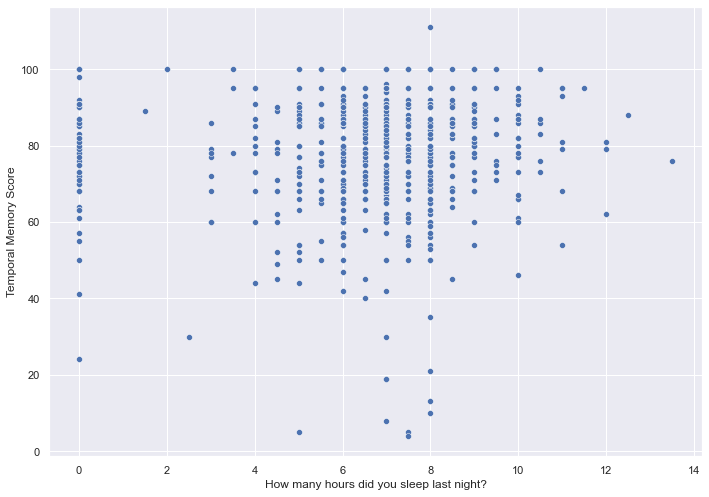

In [20]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) # Set the figure size of the plot
sns.scatterplot(data=sample_10, x='How many hours did you sleep last night?', y='Temporal Memory Score' );

In [ ]:
# Hours slept is on the x axis and we call the variable on the x axis the independent variable or 
#the predictor variable

# We call the variable on the y axis the dependent variable or the outcome.

# From the visualization, can we say there's a relationship between hours slept and the temporal memory score?

#### Visualizing Data

1. Frequency: The number of times a value occurs 

2. Relative frequency: Understanding the proportion of a frequency. How the proportion relates to the whole.

3. Range of proportion: From 0 to 1 = frequency / population

4. Sum of relative frequency: Total of the relative frequency = 1

5. Percentage: Multiply the proportion by 100

6. Grouping data: Using frequency, relative frequency, percentage, tec.

7. Visualizing age data: Binning/interval/bucket, create a graph.

8. Bin size is the interval in which you're counting the frequency.

9. Using graph

10. Distribution: Symmetrical, positively skewed, negatively skewed

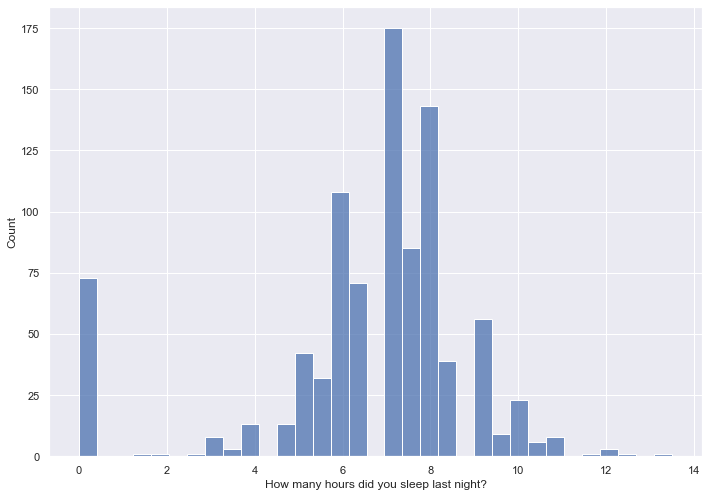

In [22]:
# Histogram
sns.histplot(data=sample_10, x= 'How many hours did you sleep last night?');

What analysis can you glean from this 👆🏼graph?

1. Which hour of sleep has the highest proportion?

2. What is the highest value on the frequency axis?

3. What is the bin size on the x-axis?

4. From the graph, is possible to say people don't usually sleep more than 10hrs?

5. What kind of distribution is this?

In [23]:
# Bar chart
# I'll load the tips dataset from seaborn datasets
tips = sns.load_dataset('tips')

In [24]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


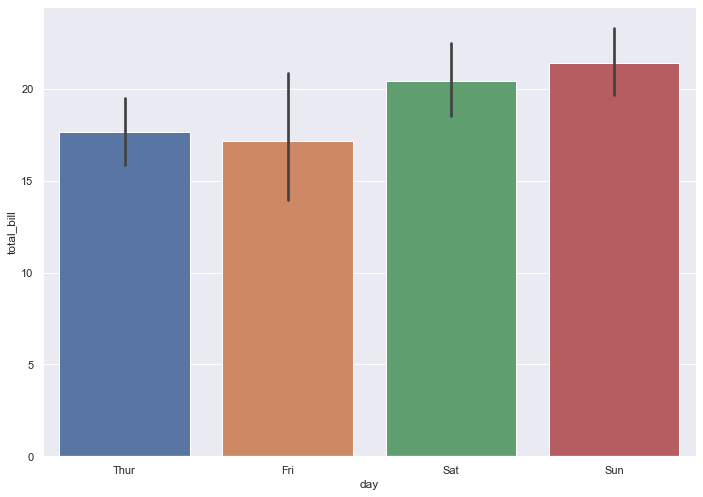

In [26]:
sns.barplot(x= 'day', y= 'total_bill', data=tips);